In [227]:
import numpy as np 
import pandas as pd
from math import *
from scipy.optimize import fmin
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import os

In [228]:
#import the data, it is saved in the same directory as the notebook as a CSV 
path = os.getcwd()
#import the data, it is saved in the same directory as the notebook as a CSV 
path = os.getcwd()
data = pd.read_csv(path + '/GBOND20010731.csv')

In [229]:
#import the data, it is saved in the same directory as the notebook as a CSV 
path = os.getcwd()
data = pd.read_csv(path + '/GBOND20010731.csv')

#separating only yield rates and maturities
yields = list(data['YTM'].values)
#converting maturity to years
maturities = list((data['TAU']/365).values)

#print first 5 elements of each list to show
print(yields[:5])
print(maturities[:5])

[5.1, 5.03, 5.1, 5.05, 5.1]
[0.26301369863013696, 0.26301369863013696, 0.26301369863013696, 0.26301369863013696, 0.43561643835616437]


In [236]:
#NSSf is the forward rate function
NSSf = lambda c, x: (c[0]) + (c[1]*(exp(-x/c[4]))) + c[2]*(x/c[4])*exp(-x/c[4]) + c[3]*(x/c[5])*exp(-x/c[5])

#we use a lambda function with input c (a vector of our parameters) and x (maturity)
NSS = lambda c, x: (c[0])+ (c[1]*((1- exp(-x/c[4]))/(x/c[4])))+ (c[2]*((((1-exp(-x/c[4]))/(x/c[4])))- (exp(-x/c[4]))))+ (c[3]*((((1-exp(-x/c[5]))/(x/c[5])))- (exp(-x/c[5]))))

#we use another lambda function to define the error terms of the regression
errors = lambda p, x, y: ((NSS(p,x)-y)**2).sum()

In [255]:
B0 = array([8.0, -3.0, -2, 3, 5, 2])
yieldsarr = array(yields)
maturitiesarr = array(maturities)
result = fmin(errors, B0, args=(maturitiesarr, yieldsarr))
result

Optimization terminated successfully.
         Current function value: 0.046818
         Iterations: 729
         Function evaluations: 1141


array([ 9.22554644, -4.38081498, -4.06010801,  1.62733262,  3.28711321,
        0.98651383])

In [258]:
plot_maturities = np.linspace(0.001, 30, 100)
plot_maturities
forwards = NSSf(result, plot_maturities)
spot = NSS(result, plot_maturities)
forwards = pd.DataFrame(forwards,plot_maturities)
spot = pd.DataFrame(spot, plot_maturities)
df = pd.merge(forwards, spot, left_index = True, right_index = True)
df.columns = ['Spot Rate','Forward Rate']
df.head(5)

,Spot Rate,Forward Rate
0.001000,4.846477,4.845605
0.304020,5.257893,5.069373
0.607040,5.501275,5.229469
0.910061,5.648716,5.346439
1.213081,5.745807,5.434776


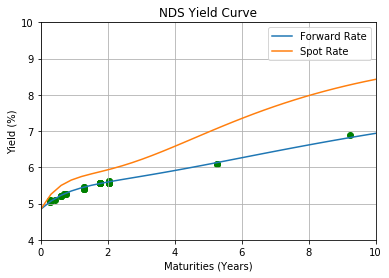

In [262]:
forward_rates = plt.plot(df['Forward Rate'])
spot_rates = plt.plot(df['Spot Rate'])
actual_yields = plt.scatter(maturities, yields, color = 'g')
plt.title('NDS Yield Curve')
plt.xlabel('Maturities (Years)')
plt.ylabel('Yield (%)')
plt.grid()
plt.legend()
plt.axis(xmin = 0, ymin = 4, xmax = 10, ymax = 10)
plt.legend()
plt.show()

In [235]:

import pylab
from numpy import *
from scipy.optimize import fmin
import pandas as pd
# parametric function, x is the independent variable
# and c are the parameters.
# it's a polynomial of degree 2
fp = lambda c, x: (c[0])+ (c[1]*((1- exp(-x/c[4]))/(x/c[4])))+ (c[2]*((((1-exp(-x/c[4]))/(x/c[4])))- (exp(-x/c[4]))))+ (c[3]*((((1-exp(-x/c[5]))/(x/c[5])))- (exp(-x/c[5]))))
real_p = array([0.02,0.01,0.01,0.01,1.00,1.00])

# error function to minimize
e = lambda p, x, y: ((fp(p,x)-y)**2).sum()

# generating data with noise

maturitiesarr = np.array(maturities)  #The periods for which data are available, skip the periods with empty rate
yieldsarr = np.array(yields)  #Available rates only

# fitting the data with fmin
p0 = array([8, -3, 0, 0, 2, 5])  # initial parameter value
p = fmin(errors, p0, args=(maturitiesarr,yieldsarr))
c = p
j=[]
for h in range(1,31,1):
    j.append((c[0])+ (c[1]*((1- exp(-h/c[4]))/(h/c[4])))+ (c[2]*((((1-exp(-h/c[4]))/(h/c[4])))- (exp(-h/c[4]))))+ (c[3]*((((1-exp(-h/c[5]))/(h/c[5])))- (exp(-h/c[5])))))

print(p)

Optimization terminated successfully.
         Current function value: 0.142178
         Iterations: 217
         Function evaluations: 371
[ 8.03587763e+00 -3.00208842e+00 -3.71197240e-03  1.20385799e-03
  4.59078248e+00  4.58361570e+00]


In [238]:
type(yields)

list